/home/nodoka/.pyenv/versions/anaconda3-5.3.0/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


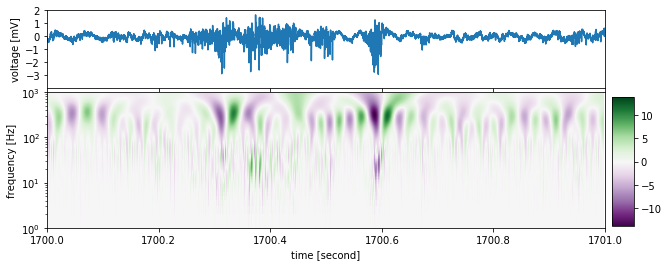

In [13]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import scipy
from scipy import signal
from pylab import *
#with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
with open('/home//nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)

starttime = 1700
endtime = 1701
start = int(starttime/0.00004)
end = int(endtime/0.00004)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
plt.subplot(4, 1, 1)
xlim(starttime,endtime)
plt.yticks([-3,-2,-1,0,1,2])
plt.ylim(-4,2)
ylabel("voltage [mV]")
plt.xticks(color="None")
plt.plot(datatime,df[start:end])
del datatime

specdatab = np.array(df[start:end])
specdataa = specdatab.flatten()
fp.close
#widths = np.arange(1, 31)
P = 1028
widths = np.arange(1, P)

plt.subplot(2, 1, 2)
cwtmatr = scipy.signal.cwt(specdataa, signal.ricker, widths)
xlabel("time [second]")
ylabel("frequency [Hz]")
plt.yticks([1,10,100,1000])
plt.ylim(1,1000)
plt.yscale("log")
im=plt.imshow(cwtmatr, extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
xlim(starttime, endtime)
axColor = plt.axes([0.91, 0.13, 0.03, 0.45])
plt.colorbar(im, cax=axColor, orientation="vertical")
#ylim(0, 4096)
#plt.colorbar(orientation='horizontal')
plt.show()

#p.show()
del df, widths

NameError: name 'endtime' is not defined